In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [129]:
df=pd.read_csv("laptop_prices.csv")

In [130]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [131]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

The dataset contains 1275 rows and 23 columns.
No null values were detected in the dataset, indicating it's complete.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [133]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


Price ranges significantly, with a minimum of 174 Euros and a maximum of 6099 Euros.
RAM sizes mostly fall between 4GB and 16GB, with outliers at 2GB and 32GB.

In [134]:
cat_df = df.select_dtypes(include='object')
for i in (cat_df):
    print(f'number of uniques values in {i} = ',cat_df[i].nunique())

number of uniques values in Company =  19
number of uniques values in Product =  618
number of uniques values in TypeName =  6
number of uniques values in OS =  9
number of uniques values in Screen =  4
number of uniques values in Touchscreen =  2
number of uniques values in IPSpanel =  2
number of uniques values in RetinaDisplay =  2
number of uniques values in CPU_company =  3
number of uniques values in CPU_model =  93
number of uniques values in PrimaryStorageType =  4
number of uniques values in SecondaryStorageType =  4
number of uniques values in GPU_company =  4
number of uniques values in GPU_model =  110


In [135]:
num_cols = [i for i in df.columns if df[i].dtype!="object"]
num_cols

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [136]:
cat_cols = [i for i in df.columns if df[i].dtype=="object"]
cat_cols

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

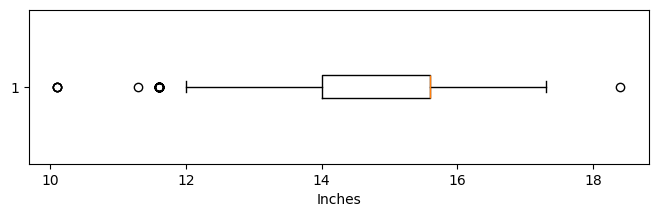

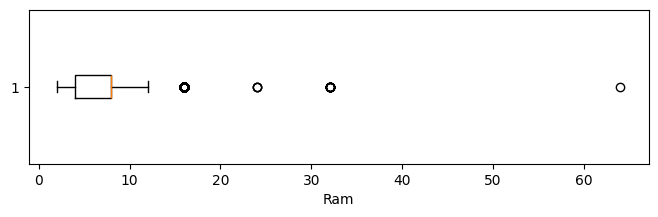

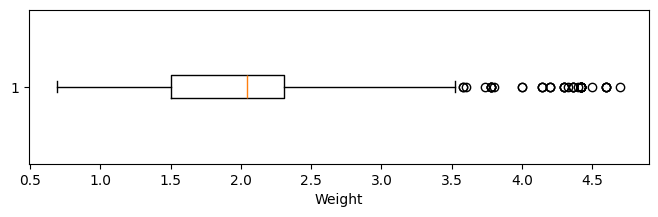

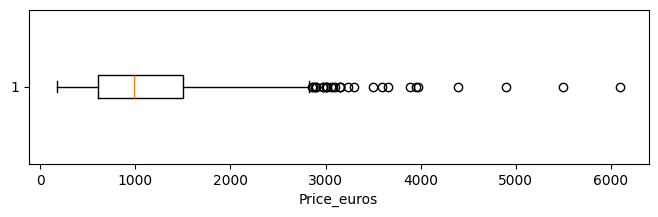

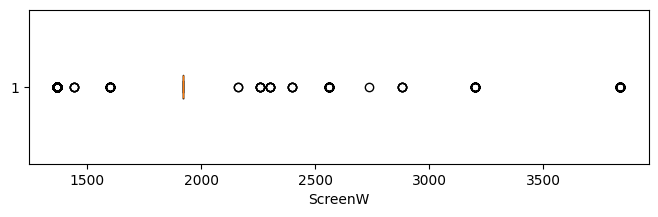

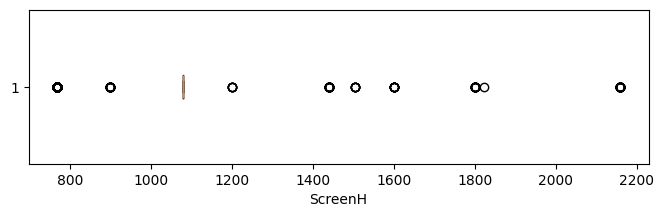

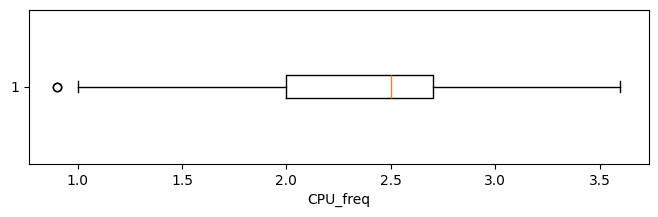

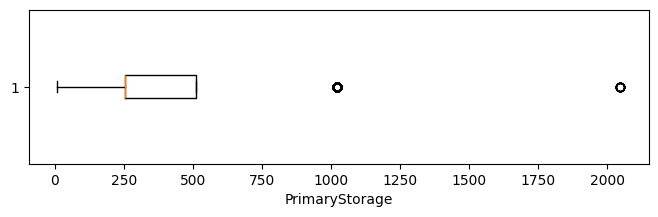

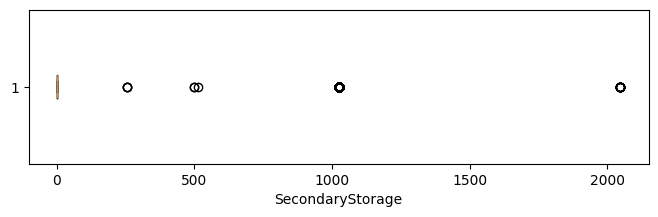

In [137]:
for i in ['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.xlabel(i)
    plt.show()

<Axes: >

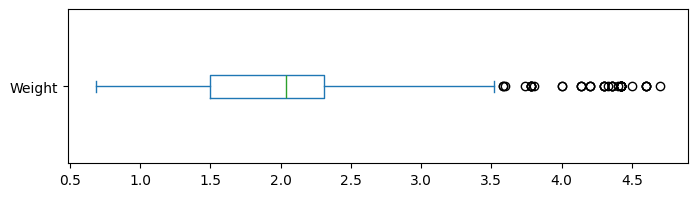

In [138]:
df["Weight"].plot.box(vert=False, figsize=(8,2))

In [139]:
df["Weight"].quantile(0.9999)

np.float64(4.687259999999992)

In [140]:
df=df[df["Weight"]<=3.5]

<Axes: >

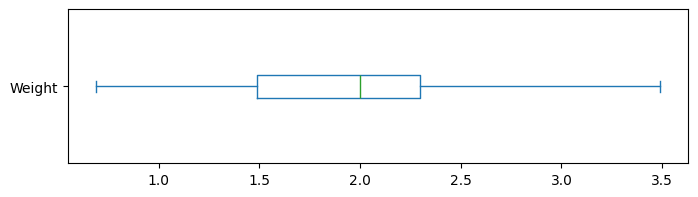

In [141]:
df["Weight"].plot.box(vert=False, figsize=(8,2))

<Axes: >

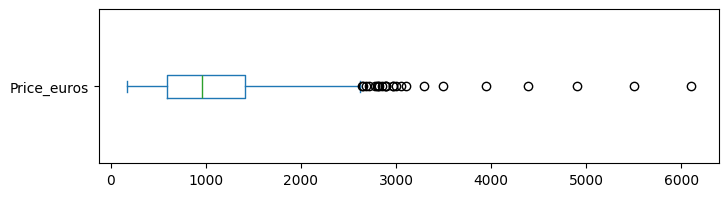

In [142]:
df["Price_euros"].plot.box(vert=False, figsize=(8,2))

In [143]:
df["Price_euros"].quantile(0.999)

np.float64(5362.200000000097)

In [144]:
df=df[df["Price_euros"]<=2650]

<Axes: >

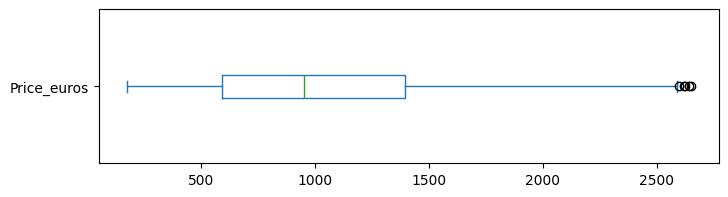

In [145]:
df["Price_euros"].plot.box(vert=False, figsize=(8,2))

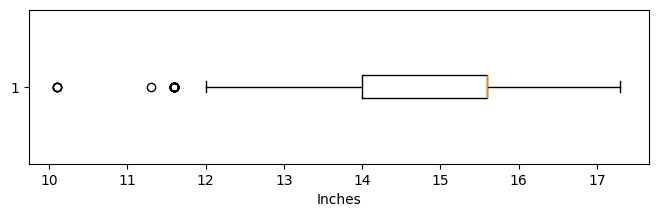

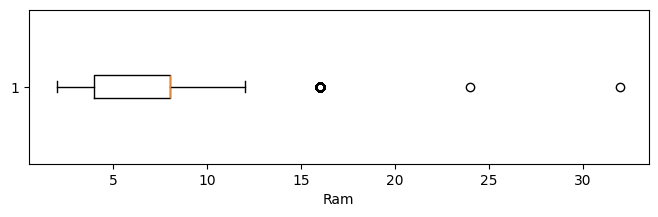

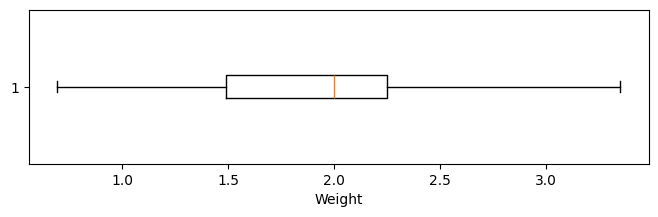

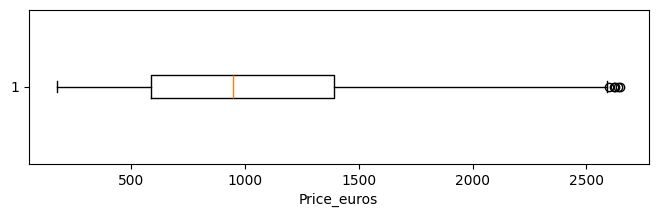

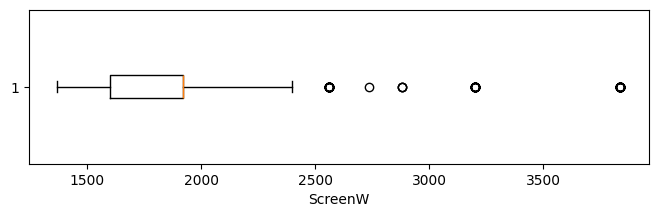

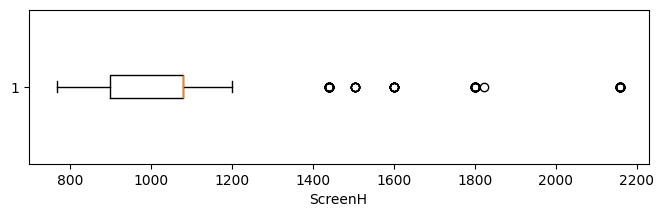

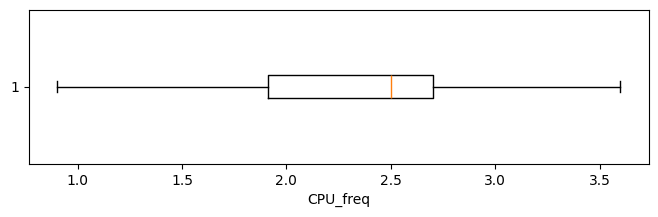

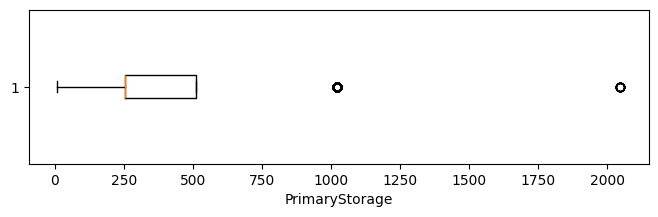

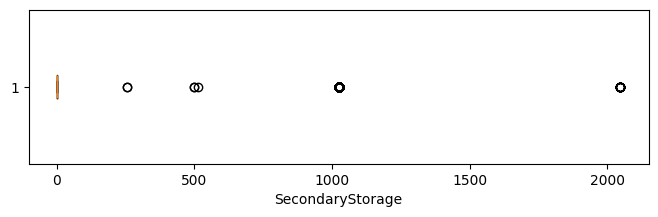

In [146]:
for i in ['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df[i], vert=False)
    plt.xlabel(i)
    plt.show()

In [147]:
df["Company"].value_counts()

Company
Lenovo       280
Dell         270
HP           261
Asus         138
Acer          98
Toshiba       47
MSI           46
Apple         20
Samsung        9
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Chuwi          3
Razer          3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [148]:
df['Product'].value_counts()

Product
XPS 13                                 29
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
V110-15ISK (i5-6200U/4GB/500GB/No       1
X553SA-XX021T (N3050/4GB/500GB/W10)     1
PL60 7RD                                1
Stream 14-AX000nv                       1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: count, Length: 581, dtype: int64

In [149]:
df['Inches'].value_counts()

Inches
15.6    639
14.0    190
13.3    158
17.3    112
12.5     38
11.6     31
13.5      6
13.9      6
12.0      6
12.3      5
10.1      4
15.0      4
15.4      3
13.0      2
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [150]:
df['TypeName'].value_counts()

TypeName
Notebook              703
Ultrabook             190
Gaming                153
2 in 1 Convertible    116
Netbook                23
Workstation            22
Name: count, dtype: int64

In [151]:
df['Ram'].value_counts()

Ram
8     606
4     367
16    158
6      35
12     23
2      16
32      1
24      1
Name: count, dtype: int64

In [152]:
df['OS'].value_counts()

OS
Windows 10      986
No OS            65
Linux            58
Windows 7        41
Chrome OS        27
macOS            12
Mac OS X          8
Windows 10 S      8
Android           2
Name: count, dtype: int64

In [153]:
print(df['Weight'].value_counts())

Weight
2.200    120
2.100     58
2.000     45
2.400     41
2.300     37
        ... 
0.990      1
2.591      1
2.210      1
2.191      1
2.340      1
Name: count, Length: 151, dtype: int64


In [154]:
df['Price_euros'].value_counts()

Price_euros
1099.00    14
1799.00    13
1499.00    12
1199.00    11
499.00     11
           ..
597.57      1
361.80      1
1600.00     1
875.00      1
2139.97     1
Name: count, Length: 744, dtype: int64

In [155]:
df['Screen'].value_counts()

Screen
Full HD        784
Standard       365
4K Ultra HD     31
Quad HD+        27
Name: count, dtype: int64

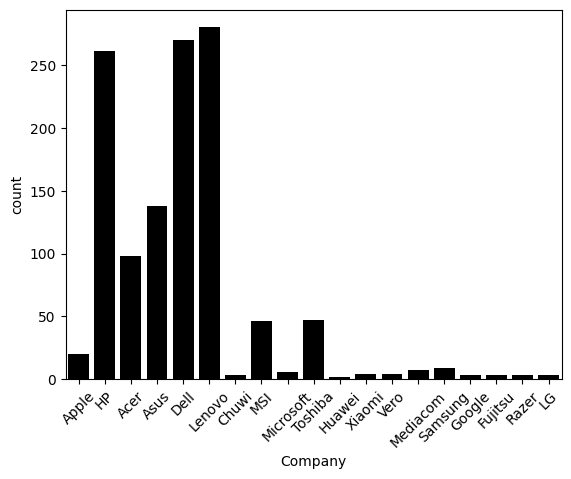

In [156]:
sns.countplot(x=df["Company"],color='black')
plt.xticks(rotation=45)
plt.show()

Lenovo, Dell, and HP have the highest laptop counts.

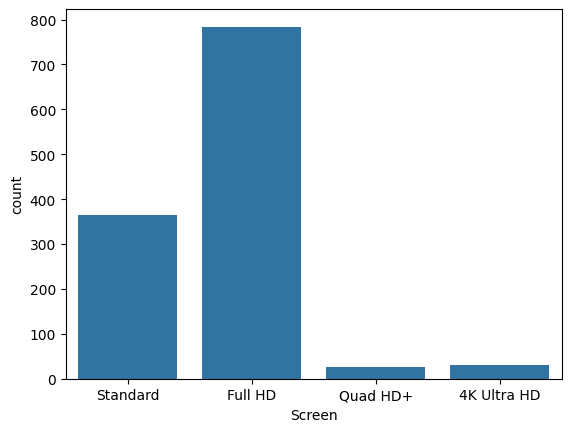

In [157]:
sns.countplot(x=df["Screen"])
plt.show()

Full HD have the highest Screen counts.

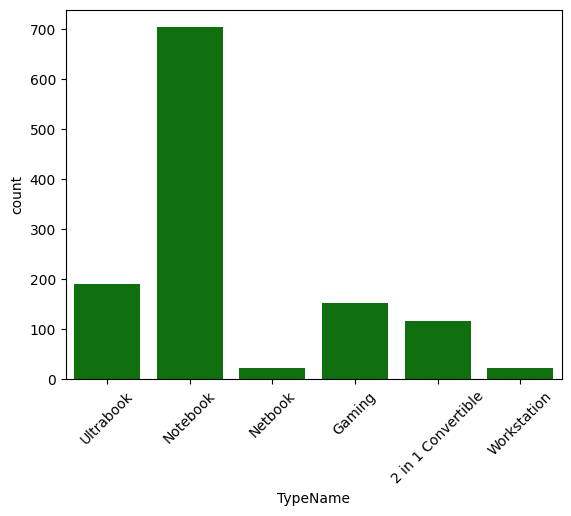

In [158]:
sns.countplot(x=df["TypeName"],color='green')
plt.xticks(rotation=45)
plt.show()

Notebook is highest count

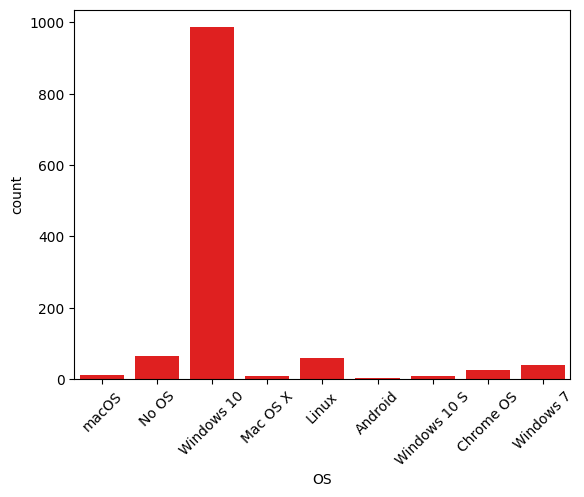

In [159]:
sns.countplot(x=df["OS"],color='red')
plt.xticks(rotation=45)
plt.show()

windows 10 is the more laptops are sale compaire to other

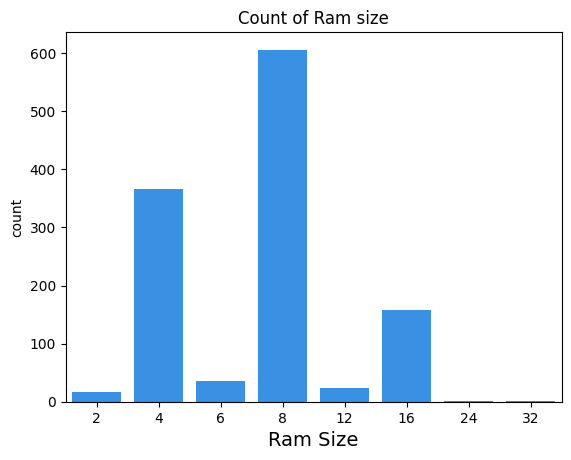

In [160]:
sns.countplot(x='Ram', data=df, color='dodgerblue')
plt.title("Count of Ram size")
plt.xlabel('Ram Size', fontsize=14, c='k')
plt.show()

The majority of laptops have 8GB or 4GB of RAM.

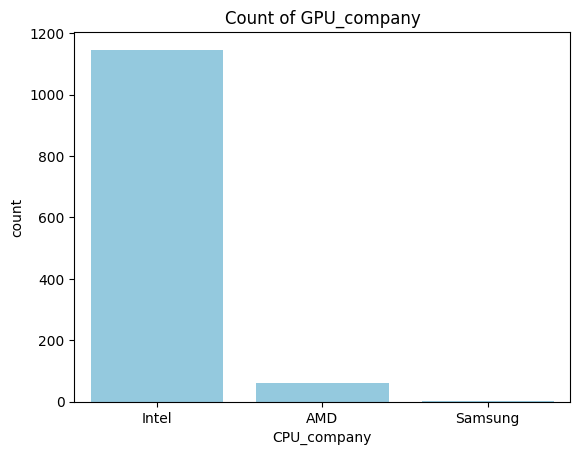

In [161]:
sns.countplot(df, x='CPU_company', color='skyblue')
plt.title('Count of GPU_company')
plt.show()

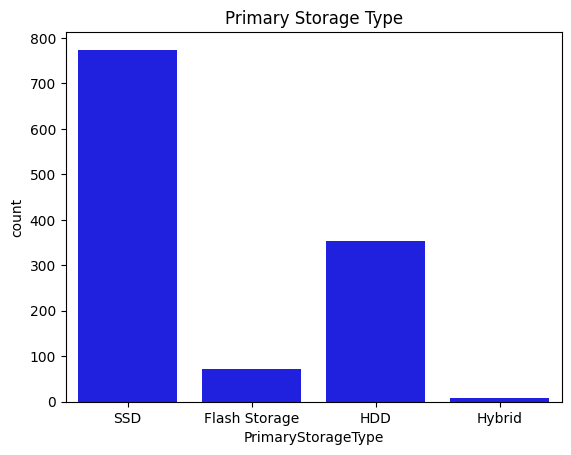

In [162]:
sns.countplot(df, x='PrimaryStorageType', color='blue')
plt.title('Primary Storage Type')
plt.show()

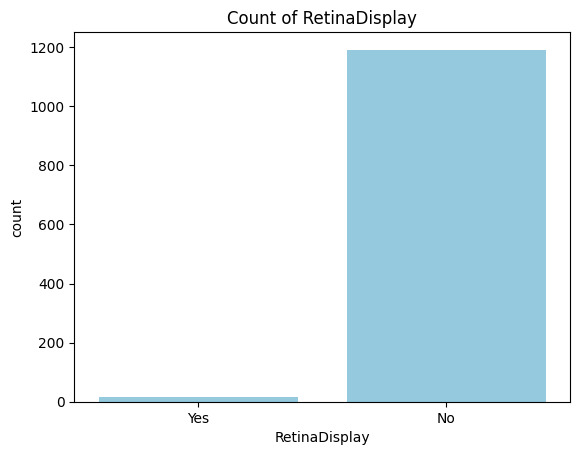

In [163]:
sns.countplot(df, x='RetinaDisplay', color='skyblue')
plt.title('Count of RetinaDisplay')
plt.show()



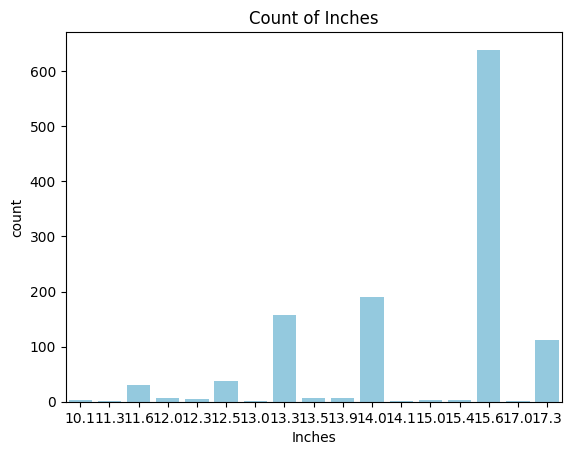

In [164]:
sns.countplot(df, x='Inches', color='skyblue')
plt.title('Count of Inches')
plt.show()


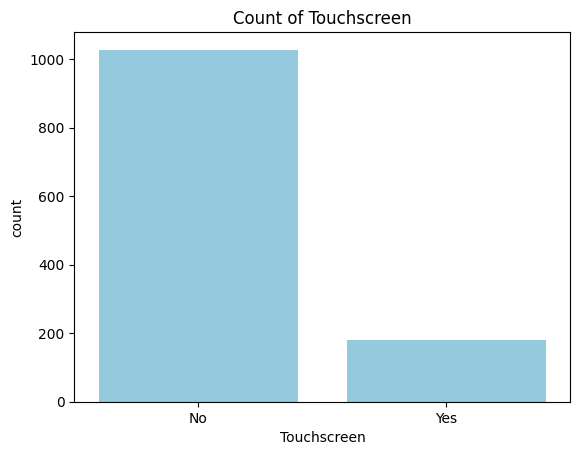

In [165]:
sns.countplot(df, x='Touchscreen', color='skyblue')
plt.title('Count of Touchscreen')
plt.show()


In [166]:
df[df["Touchscreen"]=='Yes'].value_counts().sum()

np.int64(180)

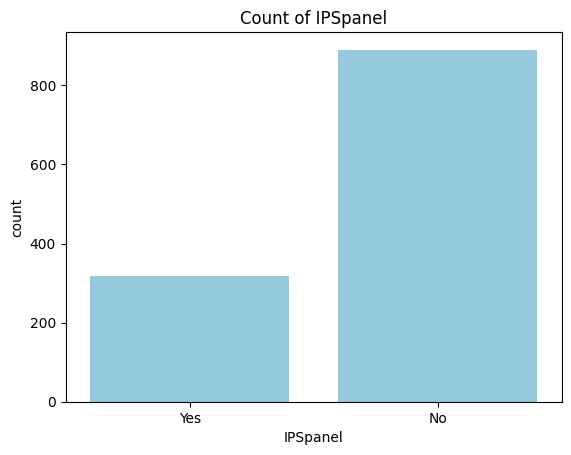

In [167]:
sns.countplot(df, x='IPSpanel', color='skyblue')
plt.title('Count of IPSpanel')
plt.show()

In [168]:
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['Product'] = le.fit_transform(df['Product'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['OS'] = le.fit_transform(df['OS'])
df['Screen'] = le.fit_transform(df['Screen'])
df['Touchscreen'] = le.fit_transform(df['Touchscreen'])
df['IPSpanel'] = le.fit_transform(df['IPSpanel'])
df['RetinaDisplay'] = le.fit_transform(df['RetinaDisplay'])
df['CPU_company'] = le.fit_transform(df['CPU_company'])
df['CPU_model'] = le.fit_transform(df['CPU_model'])
df[ 'PrimaryStorageType'] = le.fit_transform(df[ 'PrimaryStorageType'])
df['SecondaryStorageType'] = le.fit_transform(df['SecondaryStorageType'])
df['GPU_company'] = le.fit_transform(df['GPU_company'])
df['GPU_model'] = le.fit_transform(df['GPU_model'])


In [169]:
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,287,4,13.3,8,8,1.37,1339.69,3,2560,...,1,1,2.3,40,128,0,3,1,2,53
1,1,288,4,13.3,8,8,1.34,898.94,3,1440,...,0,1,1.8,40,128,0,0,1,2,46
2,7,50,3,15.6,8,4,1.86,575.00,1,1920,...,0,1,2.5,46,256,0,3,1,2,48
3,1,287,4,15.4,16,8,1.83,2537.45,3,2880,...,1,1,2.7,54,512,0,3,1,0,70
4,1,287,4,13.3,8,8,1.37,1803.60,3,2560,...,1,1,3.1,40,256,0,3,1,2,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,10,544,0,14.0,4,5,1.80,638.00,1,1920,...,0,1,2.5,55,128,0,3,1,2,42
1271,10,552,0,13.3,16,5,1.30,1499.00,2,3200,...,0,1,2.5,55,512,0,3,1,2,42
1272,10,186,3,14.0,2,5,1.50,229.00,3,1366,...,0,1,1.6,20,64,0,0,1,2,35
1273,7,2,3,15.6,6,5,2.19,764.00,3,1366,...,0,1,2.5,55,1024,0,1,1,0,81


In [170]:
new_df = df.drop(cat_cols, axis=1)

In [171]:
new_df

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0
1,13.3,8,1.34,898.94,1440,900,1.8,128,0
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0
...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,638.00,1920,1080,2.5,128,0
1271,13.3,16,1.30,1499.00,3200,1800,2.5,512,0
1272,14.0,2,1.50,229.00,1366,768,1.6,64,0
1273,15.6,6,2.19,764.00,1366,768,2.5,1024,0


In [172]:
new_df = pd.concat([new_df, df], axis=1)

In [173]:
scaler = StandardScaler()

In [174]:
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [175]:
new_df.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,-1.179359,0.051270,-1.122754,0.532834,1.472168,2.010358,0.043081,-0.857635,-0.381189,1,...,1,1,0.043081,40,-0.857635,-0.381189,3,1,2,53
1,-1.179359,0.051270,-1.180788,-0.256166,-0.939755,-0.599217,-0.949268,-0.857635,-0.381189,1,...,0,1,-0.949268,40,-0.857635,-0.381189,0,1,2,46
2,0.489526,0.051270,-0.174870,-0.836061,0.093926,0.071817,0.440021,-0.510257,-0.381189,7,...,0,1,0.440021,46,-0.510257,-0.381189,3,1,2,48
3,0.344406,2.131385,-0.232904,2.676980,2.161288,2.755950,0.836961,0.184500,-0.381189,1,...,1,1,0.836961,54,0.184500,-0.381189,3,1,0,70
4,-1.179359,0.051270,-1.122754,1.363293,1.472168,2.010358,1.630840,-0.510257,-0.381189,1,...,1,1,1.630840,40,-0.510257,-0.381189,3,1,2,54


In [176]:
y= new_df['Price_euros']
x=new_df.drop("Price_euros", axis=1)

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [178]:
y_test.shape

(302, 2)

In [179]:
y_train.shape

(905, 2)

In [180]:
x_test.shape

(302, 30)

In [181]:
x_train.shape

(905, 30)

In [182]:
model= RandomForestRegressor(random_state=42)


In [183]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [184]:
model.score(x_train, y_train)

0.9796047048013502